## Zero Initialization Practical with Relu

### Importing Libraries

### Importing Data

In [43]:
df = pd.read_csv('1.ushape.csv')

In [44]:
# pip install tensorflow

In [45]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow
from tensorflow import keras
from keras import Sequential
from keras.layers import Dense

In [46]:
df.head()

,X,Y,Class
0,0.031595,0.986988,0.0
1,2.115098,-0.046200,1.0
2,0.882490,-0.075800,0.0
3,-0.055100,-0.037300,1.0
4,0.829545,-0.539000,1.0


### Ploting data

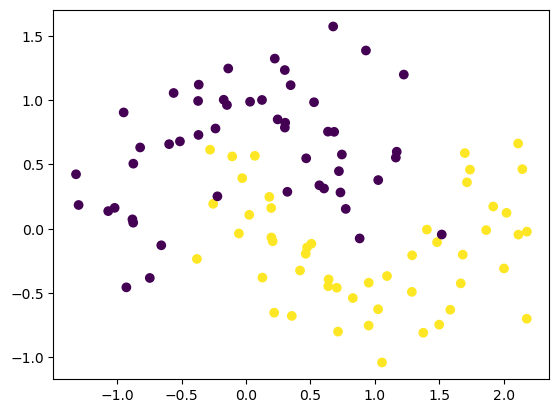

In [47]:
plt.scatter(df['X'],df['Y'],c=df['Class'])

### Independent & Dependent Features

In [48]:
X = df.iloc[:,0:2].values
y = df.iloc[:,-1].values

### Model Creation

In [61]:
model = Sequential()

model.add(Dense(2,activation='relu',input_dim=2))
model.add(Dense(1,activation='sigmoid'))

model.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_4 (Dense)                 │ (None, 2)              │             6 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 1)              │             3 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 9 (36.00 B)

 Trainable params: 9 (36.00 B)

 Non-trainable params: 0 (0.00 B)

### Default Weights Assign by Keras

In [62]:
model.get_weights()

[array([[ 1.0560111 ,  1.0255245 ],
        [-1.0176086 ,  0.23950696]], dtype=float32),
 array([0., 0.], dtype=float32),
 array([[ 0.25871015],
        [-1.3376704 ]], dtype=float32),
 array([0.], dtype=float32)]

In [63]:
# Assiging the weights to varible
initial_weights = model.get_weights()

### Assigning all Weights to Zero 

In [64]:
initial_weights[0] = np.zeros(model.get_weights()[0].shape)*0.5
initial_weights[1] = np.zeros(model.get_weights()[1].shape)*0.5
initial_weights[2] = np.zeros(model.get_weights()[2].shape)*0.5
initial_weights[3] = np.zeros(model.get_weights()[3].shape)*0.5

In [65]:
initial_weights

[array([[0., 0.],
        [0., 0.]]),
 array([0., 0.]),
 array([[0.],
        [0.]]),
 array([0.])]

### Assigning Zero weight to model

In [66]:
model.set_weights(initial_weights)

In [67]:
model.get_weights()

[array([[0., 0.],
        [0., 0.]], dtype=float32),
 array([0., 0.], dtype=float32),
 array([[0.],
        [0.]], dtype=float32),
 array([0.], dtype=float32)]

### Model Compiling

In [68]:
model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])

### Model Training

In [69]:
history = model.fit(X,y,epochs=100,validation_split=0.2)

Epoch 1/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 103ms/step - accuracy: 0.4477 - loss: 0.6932 - val_accuracy: 0.5000 - val_loss: 0.6931
Epoch 2/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - accuracy: 0.5117 - loss: 0.6931 - val_accuracy: 0.5000 - val_loss: 0.6931
Epoch 3/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - accuracy: 0.4688 - loss: 0.6932 - val_accuracy: 0.5000 - val_loss: 0.6931
Epoch 4/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - accuracy: 0.4922 - loss: 0.6932 - val_accuracy: 0.5000 - val_loss: 0.6931
Epoch 5/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - accuracy: 0.4688 - loss: 0.6932 - val_accuracy: 0.5000 - val_loss: 0.6931
Epoch 6/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - accuracy: 0.5195 - loss: 0.6931 - val_accuracy: 0.5000 - val_loss: 0.6931
Epoch 7/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - accuracy: 0.4922 - loss: 0.6932 - val_accuracy: 0.5000 - val_loss: 0.6931
Epoch 8/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - accuracy: 0.5117 - loss: 0.6931 - val_accuracy: 0.5000 - val_loss

In [70]:
model.get_weights()

[array([[0., 0.],
        [0., 0.]], dtype=float32),
 array([0., 0.], dtype=float32),
 array([[0.],
        [0.]], dtype=float32),
 array([-0.00500819], dtype=float32)]

In [71]:
# pip install mlxtend

9600/9600 ━━━━━━━━━━━━━━━━━━━━ 9s 887us/step


/opt/conda/lib/python3.10/site-packages/mlxtend/plotting/decision_regions.py:315: UserWarning: No contour levels were found within the data range.
  ax.contour(xx, yy, Z, cset.levels, **contour_kwargs)


<AxesSubplot: >

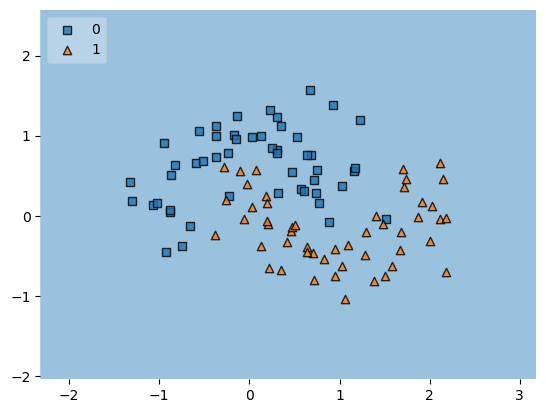

In [72]:
from mlxtend.plotting import plot_decision_regions
plot_decision_regions(X,y.astype('int'), clf=model, legend=2)

## Using Tanh Function

### Creating Model

In [75]:
model = Sequential()

model.add(Dense(2,activation='tanh',input_dim=2))
model.add(Dense(1,activation='sigmoid'))

model.summary()

Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_7 (Dense)                 │ (None, 2)              │             6 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_8 (Dense)                 │ (None, 1)              │             3 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 9 (36.00 B)

 Trainable params: 9 (36.00 B)

 Non-trainable params: 0 (0.00 B)

### Default Weights Assign by Keras

In [76]:
model.get_weights()

[array([[ 0.6210011 , -1.1856952 ],
        [-0.25444698, -0.00884449]], dtype=float32),
 array([0., 0.], dtype=float32),
 array([[-0.7467727],
        [ 1.1858188]], dtype=float32),
 array([0.], dtype=float32)]

In [77]:
# Assiging the weights to varible
initial_weights = model.get_weights()

### Assigning all Weights to Zero 

In [78]:
initial_weights[0] = np.zeros(model.get_weights()[0].shape)*0.5
initial_weights[1] = np.zeros(model.get_weights()[1].shape)*0.5
initial_weights[2] = np.zeros(model.get_weights()[2].shape)*0.5
initial_weights[3] = np.zeros(model.get_weights()[3].shape)*0.5

In [79]:
initial_weights

[array([[0., 0.],
        [0., 0.]]),
 array([0., 0.]),
 array([[0.],
        [0.]]),
 array([0.])]

### Assigning Zero weight to model

In [80]:
model.set_weights(initial_weights)

In [81]:
model.get_weights()

[array([[0., 0.],
        [0., 0.]], dtype=float32),
 array([0., 0.], dtype=float32),
 array([[0.],
        [0.]], dtype=float32),
 array([0.], dtype=float32)]

### Model Compiling

In [82]:
model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])

### Model Training

In [83]:
history = model.fit(X,y,epochs=100,validation_split=0.2)

Epoch 1/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 105ms/step - accuracy: 0.4680 - loss: 0.6932 - val_accuracy: 0.5000 - val_loss: 0.6931
Epoch 2/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - accuracy: 0.4844 - loss: 0.6932 - val_accuracy: 0.5000 - val_loss: 0.6931
Epoch 3/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - accuracy: 0.5156 - loss: 0.6931 - val_accuracy: 0.5000 - val_loss: 0.6931
Epoch 4/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - accuracy: 0.4961 - loss: 0.6932 - val_accuracy: 0.5000 - val_loss: 0.6931
Epoch 5/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - accuracy: 0.4883 - loss: 0.6932 - val_accuracy: 0.5000 - val_loss: 0.6931
Epoch 6/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - accuracy: 0.5195 - loss: 0.6931 - val_accuracy: 0.5000 - val_loss: 0.6931
Epoch 7/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - accuracy: 0.5312 - loss: 0.6931 - val_accuracy: 0.5000 - val_loss: 0.6931
Epoch 8/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - accuracy: 0.4922 - loss: 0.6932 - val_accuracy: 0.5000 - val_loss

In [84]:
model.get_weights()

[array([[0., 0.],
        [0., 0.]], dtype=float32),
 array([0., 0.], dtype=float32),
 array([[0.],
        [0.]], dtype=float32),
 array([0.00685412], dtype=float32)]

9600/9600 ━━━━━━━━━━━━━━━━━━━━ 9s 886us/step


/opt/conda/lib/python3.10/site-packages/mlxtend/plotting/decision_regions.py:315: UserWarning: No contour levels were found within the data range.
  ax.contour(xx, yy, Z, cset.levels, **contour_kwargs)


<AxesSubplot: >

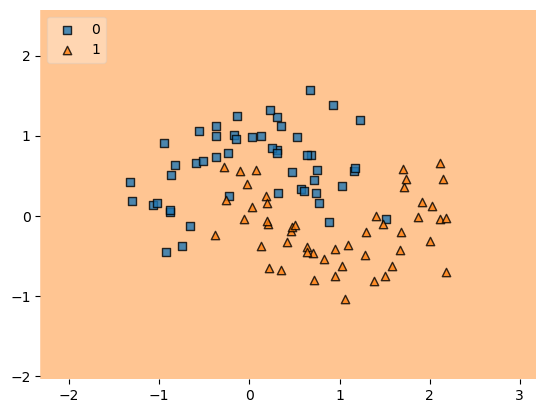

In [85]:
from mlxtend.plotting import plot_decision_regions
plot_decision_regions(X,y.astype('int'), clf=model, legend=2)